In [1]:
from All_Functions_FF import * 

In [2]:
##################### Data preparation ###################

data = pd.read_csv('FFData.CSV')

MKT = data["Mkt-RF"]
MKT = MKT.to_numpy().reshape(-1,1)

SMB = data["SMB"]
SMB = SMB.to_numpy().reshape(-1,1)

HML = data["HML"]
HML = HML.to_numpy().reshape(-1,1)

RF = data["RF"]
RF = RF.to_numpy().reshape(-1,1)


# monthly data
index_1927 = data["Year"].to_list().index(1927)
MKT_te = MKT[0:index_1927-1,:]
SMB_te = SMB[0:index_1927-1,:]
HML_te = HML[0:index_1927-1,:]
RF_te = RF[0:index_1927-1,:]


# data standardization
MKT_te =(MKT_te-np.mean(MKT_te))/np.std(MKT_te)
SMB_te =(SMB_te-np.mean(SMB_te))/np.std(SMB_te)
HML_te =(HML_te-np.mean(HML_te))/np.std(HML_te)
RF_te =(RF_te-np.mean(RF_te))/np.std(RF_te)

/var/folders/42/lzyqp82x5n97th0ryxnzvq440000gn/T/ipykernel_48764/3628289379.py:17: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(Y, 25, interpolation = 'midpoint')
/var/folders/42/lzyqp82x5n97th0ryxnzvq440000gn/T/ipykernel_48764/3628289379.py:19: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(Y, 75, interpolation = 'midpoint')


By removing outliers w.r.t y, the number of data being removed is  65


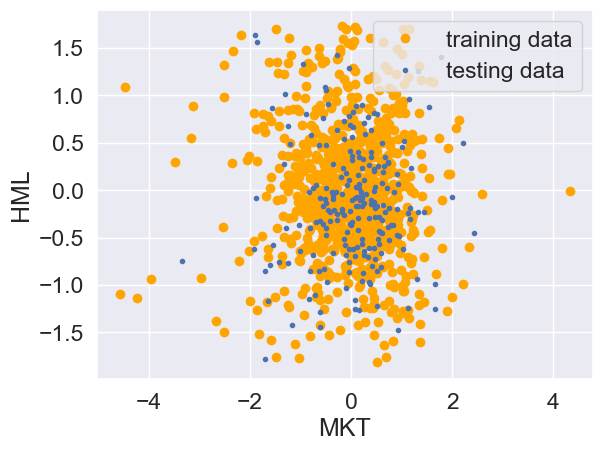

/Users/dm8341/anaconda3/lib/python3.10/site-packages/quantile_forest/_quantile_forest.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  super(BaseForestQuantileRegressor, self).fit(X, y, sample_weight=sample_weight)
/Users/dm8341/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dm8341/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


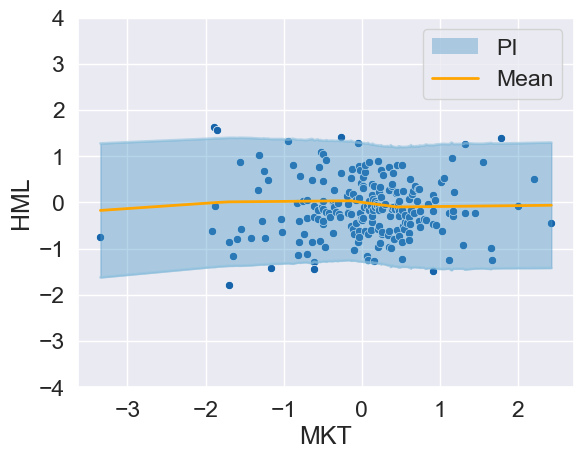

The overall coverage is 0.9634703196347032
The mean bandwidth for testing data is 1.718738057019614
The median bandwidth for testing data is 1.689543961588049


/Users/dm8341/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dm8341/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(


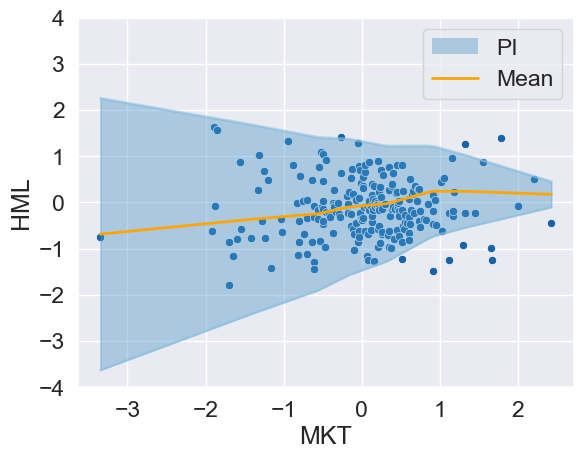

The overall coverage is 0.954337899543379
The mean bandwidth for testing data is 2.022875678330331
The median bandwidth for testing data is 1.7984851858497621


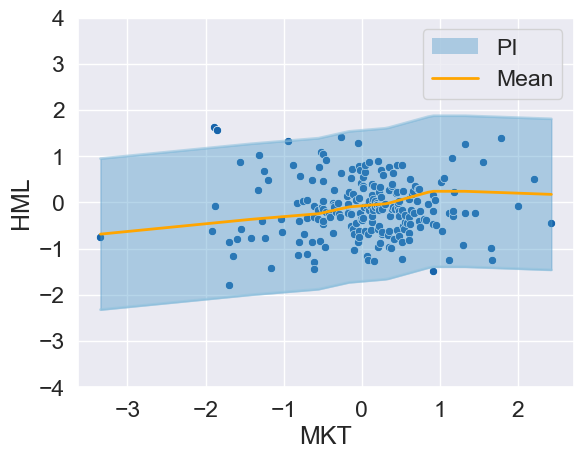

The overall coverage is 0.9863013698630136
The mean bandwidth for testing data is 2.6714815909598633
The median bandwidth for testing data is 2.6714815909598633


In [4]:
################################ MKT VS HML #####################################

##################### Making (X, Y) ###########################

X_axis = "MKT"
Y_axis = "HML"
X = MKT_te
Y = HML_te

# cut = np.where((X<=1.5) & (X>=-1.5))[0]
# X = X[cut,:]
# Y = Y[cut,:]
#print("By constraint on [-1.5,1.5], the number of data being removed is ", MKT_te.shape[0]-X.shape[0])

# Remove outliers (w.r.t Y ) using IQR
Data = np.hstack([X,Y])
Q1 = np.percentile(Y, 25, interpolation = 'midpoint')
 
Q3 = np.percentile(Y, 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper=Q3+1.5*IQR
upper_array=np.array(Y<=upper)
lower=Q1-1.5*IQR
lower_array=np.array(Y>=lower)
index_keep = upper_array & lower_array
Data = Data[index_keep[:,0].tolist(),:]
print("By removing outliers w.r.t y, the number of data being removed is ", Y.shape[0]-Data.shape[0])


########################### UTOPIA #########################


# np.random.seed(2)
# np.random.shuffle(Data)
train_idx = int(Data.shape[0] * 0.8)
train_data, test_data = np.split(Data, [train_idx])
X_pre = train_data[:,0].reshape(-1,1)
Y_pre = train_data[:,1].reshape(-1,1)
X_opt = train_data[:,0].reshape(-1,1)
Y_opt = train_data[:,1].reshape(-1,1)
X_adj = train_data[:,0].reshape(-1,1)
Y_adj = train_data[:,1].reshape(-1,1)
X_t = test_data[:,0].reshape(-1,1)
Y_t = test_data[:,1].reshape(-1,1)



n_pre = len(X_pre)
n_opt = len(X_opt)
n_adj = len(X_adj)
n_t = len(X_t)

# plot training and testing data
plt.plot(X_opt,Y_opt,'o',color = 'orange',label = 'training data')
plt.plot(X_t,Y_t,'.', label = 'testing data')
plt.xlabel(X_axis)
plt.ylabel(Y_axis)
plt.legend(loc="upper right")
plt.show()

# Obtain mean estimator
known_mean = "False"
if known_mean == "True":
    M_pre = np.zeros(n_pre).reshape(-1,1)
    M_opt = np.zeros(n_opt).reshape(-1,1)
    M_adj = np.zeros(n_adj).reshape(-1,1)
    M_t = np.zeros(n_t).reshape(-1,1)
else:
    est_type = "NN1"
    M_pre, M_opt, M_adj, M_t = mean_est(est_type,X_pre,Y_pre,X_opt,X_adj,X_t)
    
    
    
# Obtain variance estimator
var_opt, var_adj, var_t = var_est(X_pre,Y_pre,M_pre, X_opt,X_adj,X_t,est_type ="NN1")


    
# Obtain quantile estimators
quantile = [0.05,0.35,0.65,0.95]
m1,Q1_opt,Q1_adj,Q1_t = est_quantile("NN1",quantile[0],X_pre,Y_pre,X_opt,X_adj,X_t)
m2,Q2_opt,Q2_adj,Q2_t = est_quantile("NN2",quantile[1],X_pre,Y_pre,X_opt,X_adj,X_t)
m3,Q3_opt,Q3_adj,Q3_t = est_quantile("qrf",quantile[2],X_pre,Y_pre,X_opt,X_adj,X_t)
m4,Q4_opt,Q4_adj,Q4_t = est_quantile("gb",quantile[3],X_pre,Y_pre,X_opt,X_adj,X_t)

# construct estimator matrix
E_opt = np.hstack(((Q1_opt-M_opt)**2, (Q2_opt-M_opt)**2, (Q3_opt-M_opt)**2, (Q4_opt-M_opt)**2, var_opt))
E_opt = E_opt.T
E_adj = np.hstack(((Q1_adj-M_adj)**2, (Q2_adj-M_adj)**2, (Q3_adj-M_adj)**2, (Q4_adj-M_adj)**2, var_adj))
E_adj = E_adj.T
E_t = np.hstack(((Q1_t-M_t)**2, (Q2_t-M_t)**2, (Q3_t-M_t)**2, (Q4_t-M_t)**2, var_t))
E_t = E_t.T

# solve optimization problem

optimal_weight, V100_adj, V100_t = solve_opt(X_opt,Y_opt, M_opt, M_adj, M_t, X_adj, X_t, "aug", E_opt, E_adj, E_t)
#V100_adj, V100_t = solve_opt(X_opt,Y_opt, M_opt, M_adj, M_t, X_adj, X_t, "rkhs_poly", degree = 3)
#V100_adj, V100_t = solve_opt(X_opt,Y_opt, M_opt, M_adj, M_t, X_adj, X_t, "rkhs_rbf", sigma = 2)

# adjust interval
alpha = 0.05
delta = interval_adj(X_adj,Y_adj,M_adj,V100_adj,alpha)

# plot
#my_plot(X_t,Y_t,M_t,V100_t)
V_alpha_t = delta*V100_t
my_plot(X_t,Y_t,M_t,V_alpha_t,X_axis = X_axis, Y_axis = Y_axis,ylim = [-4,4])



########################### LQR #########################

lin_idx = int(Data.shape[0] * 0.4)
quantile_idx = int(Data.shape[0] * 0.8)
lin_data, quantile_data, test_data = np.split(Data, [lin_idx, quantile_idx])

X_lin = lin_data[:,0].reshape(-1,1)
Y_lin = lin_data[:,1].reshape(-1,1)
y_lin = Y_lin[:,0]
X_quantile = quantile_data[:,0].reshape(-1,1)
Y_quantile = quantile_data[:,1].reshape(-1,1)
X_test = test_data[:,0].reshape(-1,1)
Y_test = test_data[:,1].reshape(-1,1)

# Estimate the mean using NN1
est_type = "NN1"
M_quantile, M_test = mean_est_2(est_type,X_lin,Y_lin,X_quantile,X_test)

# Estimate the quantile
alpha = 0.05

model_quantile = QuantileRegressor(quantile=1-(alpha/2), alpha=0)
model_quantile.fit(X_quantile, Y_quantile-M_quantile)
Q_test = model_quantile.predict(X_test)


V_test = Q_test**2
V_test = V_test.reshape(-1,1)

my_plot(X_test,Y_test,M_test,V_test,X_axis = X_axis, Y_axis = Y_axis,ylim=[-4,4])



########################### SPLIT CF #########################

lin_idx = int(Data.shape[0] * 0.4)
res_idx = int(Data.shape[0] * 0.8)
lin_data, res_data, test_data = np.split(Data, [lin_idx, res_idx])


X_lin = lin_data[:,0].reshape(-1,1)
Y_lin = lin_data[:,1].reshape(-1,1)
y_lin = Y_lin[:,0]
X_res = res_data[:,0].reshape(-1,1)
Y_res = res_data[:,1].reshape(-1,1)
y_res = Y_res[:,0]
X_test = test_data[:,0].reshape(-1,1)
Y_test = test_data[:,1].reshape(-1,1)
y_test = Y_test[:,0]

# Estimate the mean using NN1
est_type = "NN1"
Y_res_pred, M_test = mean_est_2(est_type,X_lin,Y_lin,X_res,X_test)
y_res_pred = Y_res_pred[:,0]

# Calculate the conformity scores
residuals = np.abs(y_res - y_res_pred)

alpha = 0.05  # 95% confidence level
k = int((1 - alpha) * len(y_lin))
residuals_sorted = np.sort(residuals)
threshold = residuals_sorted[k]

# Calculate the prediction interval
v_test = (threshold**2)*np.ones(len(y_test))
V_test = v_test.reshape(-1,1)


# plot 
my_plot(X_test,Y_test,M_test,V_test,X_axis = X_axis, Y_axis = Y_axis,ylim = [-4,4])

/var/folders/42/lzyqp82x5n97th0ryxnzvq440000gn/T/ipykernel_48764/861533569.py:17: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(Y, 25, interpolation = 'midpoint')
/var/folders/42/lzyqp82x5n97th0ryxnzvq440000gn/T/ipykernel_48764/861533569.py:19: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(Y, 75, interpolation = 'midpoint')


By removing outliers w.r.t y, the number of data being removed is  34


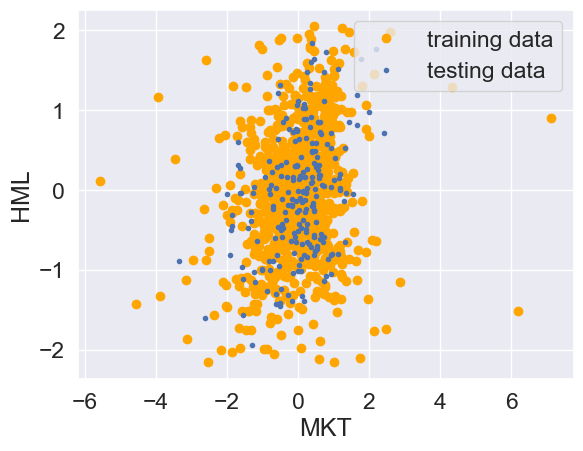

/Users/dm8341/anaconda3/lib/python3.10/site-packages/quantile_forest/_quantile_forest.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  super(BaseForestQuantileRegressor, self).fit(X, y, sample_weight=sample_weight)
/Users/dm8341/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dm8341/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


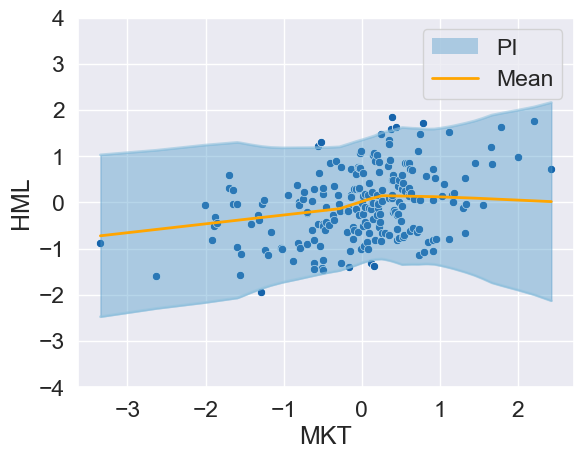

The overall coverage is 0.9601769911504425
The mean bandwidth for testing data is 2.09714645926167
The median bandwidth for testing data is 1.9754360251619145


/Users/dm8341/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dm8341/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(


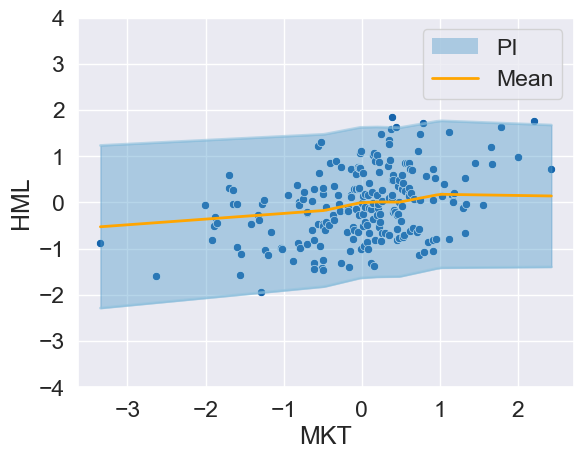

The overall coverage is 0.9823008849557522
The mean bandwidth for testing data is 2.6553709893787474
The median bandwidth for testing data is 2.642639891257123


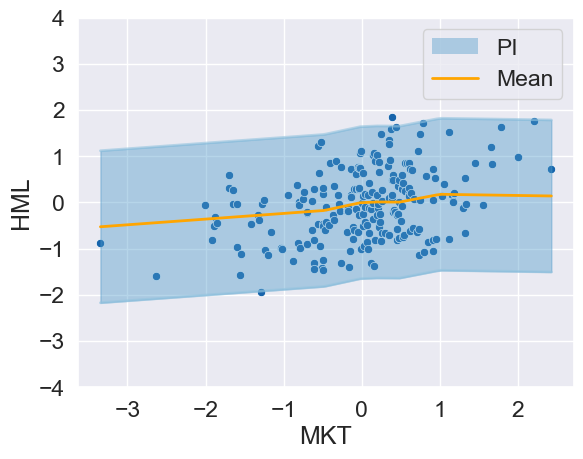

The overall coverage is 0.9911504424778761
The mean bandwidth for testing data is 2.707056373340561
The median bandwidth for testing data is 2.7070563733405613


In [5]:
################################ MKT VS SMB #####################################

##################### Making (X, Y) ###########################

X_axis = "MKT"
Y_axis = "HML"
X = MKT_te
Y = SMB_te

# cut = np.where((X<=1.5) & (X>=-1.5))[0]
# X = X[cut,:]
# Y = Y[cut,:]
#print("By constraint on [-1.5,1.5], the number of data being removed is ", MKT_te.shape[0]-X.shape[0])

# Remove outliers (w.r.t Y ) using IQR
Data = np.hstack([X,Y])
Q1 = np.percentile(Y, 25, interpolation = 'midpoint')
 
Q3 = np.percentile(Y, 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper=Q3+1.5*IQR
upper_array=np.array(Y<=upper)
lower=Q1-1.5*IQR
lower_array=np.array(Y>=lower)
index_keep = upper_array & lower_array
Data = Data[index_keep[:,0].tolist(),:]
print("By removing outliers w.r.t y, the number of data being removed is ", Y.shape[0]-Data.shape[0])


########################### UTOPIA #########################


# np.random.seed(2)
# np.random.shuffle(Data)
train_idx = int(Data.shape[0] * 0.8)
train_data, test_data = np.split(Data, [train_idx])
X_pre = train_data[:,0].reshape(-1,1)
Y_pre = train_data[:,1].reshape(-1,1)
X_opt = train_data[:,0].reshape(-1,1)
Y_opt = train_data[:,1].reshape(-1,1)
X_adj = train_data[:,0].reshape(-1,1)
Y_adj = train_data[:,1].reshape(-1,1)
X_t = test_data[:,0].reshape(-1,1)
Y_t = test_data[:,1].reshape(-1,1)



n_pre = len(X_pre)
n_opt = len(X_opt)
n_adj = len(X_adj)
n_t = len(X_t)

# plot training and testing data
plt.plot(X_opt,Y_opt,'o',color = 'orange',label = 'training data')
plt.plot(X_t,Y_t,'.', label = 'testing data')
plt.xlabel(X_axis)
plt.ylabel(Y_axis)
plt.legend(loc="upper right")
plt.show()

# Obtain mean estimator
known_mean = "False"
if known_mean == "True":
    M_pre = np.zeros(n_pre).reshape(-1,1)
    M_opt = np.zeros(n_opt).reshape(-1,1)
    M_adj = np.zeros(n_adj).reshape(-1,1)
    M_t = np.zeros(n_t).reshape(-1,1)
else:
    est_type = "NN1"
    M_pre, M_opt, M_adj, M_t = mean_est(est_type,X_pre,Y_pre,X_opt,X_adj,X_t)
    
    
    
# Obtain variance estimator
var_opt, var_adj, var_t = var_est(X_pre,Y_pre,M_pre, X_opt,X_adj,X_t,est_type ="NN1")


    
# Obtain quantile estimators
quantile = [0.05,0.35,0.65,0.95]
m1,Q1_opt,Q1_adj,Q1_t = est_quantile("NN1",quantile[0],X_pre,Y_pre,X_opt,X_adj,X_t)
m2,Q2_opt,Q2_adj,Q2_t = est_quantile("NN2",quantile[1],X_pre,Y_pre,X_opt,X_adj,X_t)
m3,Q3_opt,Q3_adj,Q3_t = est_quantile("qrf",quantile[2],X_pre,Y_pre,X_opt,X_adj,X_t)
m4,Q4_opt,Q4_adj,Q4_t = est_quantile("gb",quantile[3],X_pre,Y_pre,X_opt,X_adj,X_t)

# construct estimator matrix
E_opt = np.hstack(((Q1_opt-M_opt)**2, (Q2_opt-M_opt)**2, (Q3_opt-M_opt)**2, (Q4_opt-M_opt)**2, var_opt))
E_opt = E_opt.T
E_adj = np.hstack(((Q1_adj-M_adj)**2, (Q2_adj-M_adj)**2, (Q3_adj-M_adj)**2, (Q4_adj-M_adj)**2, var_adj))
E_adj = E_adj.T
E_t = np.hstack(((Q1_t-M_t)**2, (Q2_t-M_t)**2, (Q3_t-M_t)**2, (Q4_t-M_t)**2, var_t))
E_t = E_t.T

# solve optimization problem

optimal_weight, V100_adj, V100_t = solve_opt(X_opt,Y_opt, M_opt, M_adj, M_t, X_adj, X_t, "aug", E_opt, E_adj, E_t)
#V100_adj, V100_t = solve_opt(X_opt,Y_opt, M_opt, M_adj, M_t, X_adj, X_t, "rkhs_poly", degree = 3)
#V100_adj, V100_t = solve_opt(X_opt,Y_opt, M_opt, M_adj, M_t, X_adj, X_t, "rkhs_rbf", sigma = 2)

# adjust interval
alpha = 0.05
delta = interval_adj(X_adj,Y_adj,M_adj,V100_adj,alpha)

# plot
#my_plot(X_t,Y_t,M_t,V100_t)
V_alpha_t = delta*V100_t
my_plot(X_t,Y_t,M_t,V_alpha_t,X_axis = X_axis, Y_axis = Y_axis,ylim = [-4,4])



########################### LQR #########################

lin_idx = int(Data.shape[0] * 0.4)
quantile_idx = int(Data.shape[0] * 0.8)
lin_data, quantile_data, test_data = np.split(Data, [lin_idx, quantile_idx])

X_lin = lin_data[:,0].reshape(-1,1)
Y_lin = lin_data[:,1].reshape(-1,1)
y_lin = Y_lin[:,0]
X_quantile = quantile_data[:,0].reshape(-1,1)
Y_quantile = quantile_data[:,1].reshape(-1,1)
X_test = test_data[:,0].reshape(-1,1)
Y_test = test_data[:,1].reshape(-1,1)

# Estimate the mean using NN1
est_type = "NN1"
M_quantile, M_test = mean_est_2(est_type,X_lin,Y_lin,X_quantile,X_test)

# Estimate the quantile
alpha = 0.05

model_quantile = QuantileRegressor(quantile=1-(alpha/2), alpha=0)
model_quantile.fit(X_quantile, Y_quantile-M_quantile)
Q_test = model_quantile.predict(X_test)


V_test = Q_test**2
V_test = V_test.reshape(-1,1)

my_plot(X_test,Y_test,M_test,V_test,X_axis = X_axis, Y_axis = Y_axis,ylim=[-4,4])



########################### SPLIT CF #########################

lin_idx = int(Data.shape[0] * 0.4)
res_idx = int(Data.shape[0] * 0.8)
lin_data, res_data, test_data = np.split(Data, [lin_idx, res_idx])


X_lin = lin_data[:,0].reshape(-1,1)
Y_lin = lin_data[:,1].reshape(-1,1)
y_lin = Y_lin[:,0]
X_res = res_data[:,0].reshape(-1,1)
Y_res = res_data[:,1].reshape(-1,1)
y_res = Y_res[:,0]
X_test = test_data[:,0].reshape(-1,1)
Y_test = test_data[:,1].reshape(-1,1)
y_test = Y_test[:,0]

# Estimate the mean using NN1
est_type = "NN1"
Y_res_pred, M_test = mean_est_2(est_type,X_lin,Y_lin,X_res,X_test)
y_res_pred = Y_res_pred[:,0]

# Calculate the conformity scores
residuals = np.abs(y_res - y_res_pred)

alpha = 0.05  # 95% confidence level
k = int((1 - alpha) * len(y_lin))
residuals_sorted = np.sort(residuals)
threshold = residuals_sorted[k]

# Calculate the prediction interval
v_test = (threshold**2)*np.ones(len(y_test))
V_test = v_test.reshape(-1,1)


# plot 
my_plot(X_test,Y_test,M_test,V_test,X_axis = X_axis, Y_axis = Y_axis,ylim = [-4,4])

/var/folders/42/lzyqp82x5n97th0ryxnzvq440000gn/T/ipykernel_48764/70300768.py:17: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(Y, 25, interpolation = 'midpoint')
/var/folders/42/lzyqp82x5n97th0ryxnzvq440000gn/T/ipykernel_48764/70300768.py:19: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(Y, 75, interpolation = 'midpoint')


By removing outliers w.r.t y, the number of data being removed is  17


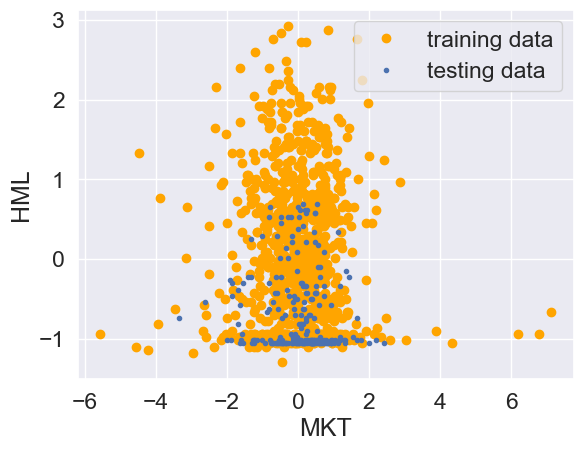

/Users/dm8341/anaconda3/lib/python3.10/site-packages/quantile_forest/_quantile_forest.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  super(BaseForestQuantileRegressor, self).fit(X, y, sample_weight=sample_weight)
/Users/dm8341/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dm8341/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


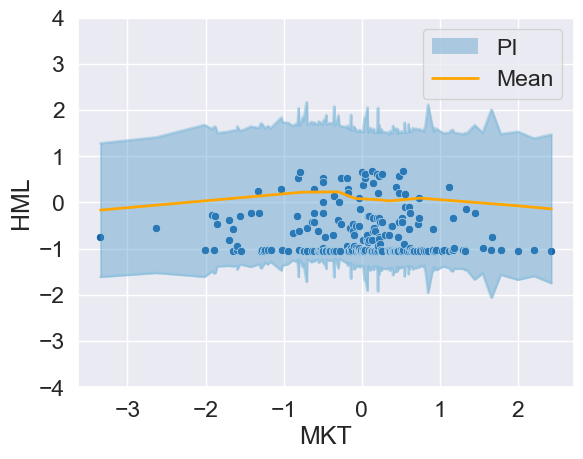

The overall coverage is 1.0
The mean bandwidth for testing data is 2.318213290364155
The median bandwidth for testing data is 2.177443210453797


/Users/dm8341/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dm8341/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(


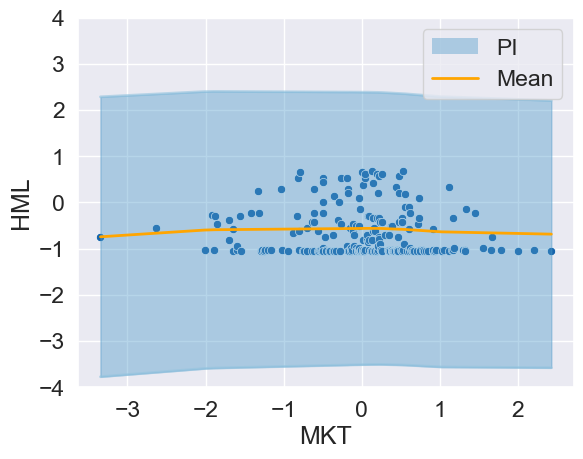

The overall coverage is 1.0
The mean bandwidth for testing data is 8.69845756126955
The median bandwidth for testing data is 8.685882555984536


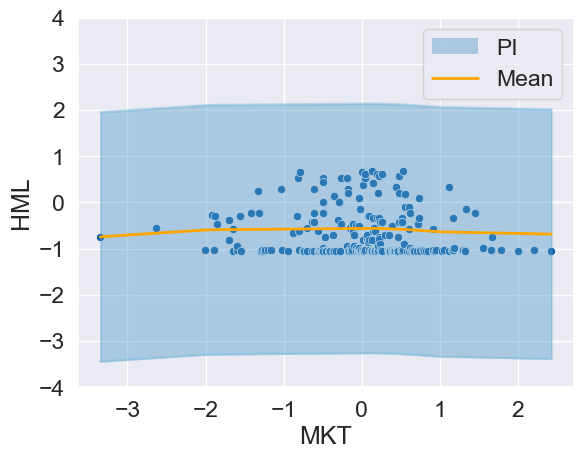

The overall coverage is 1.0
The mean bandwidth for testing data is 7.265746620198411
The median bandwidth for testing data is 7.265746620198408


In [6]:
################################ MKT VS RF #####################################

##################### Making (X, Y) ###########################

X_axis = "MKT"
Y_axis = "HML"
X = MKT_te
Y = RF_te

# cut = np.where((X<=1.5) & (X>=-1.5))[0]
# X = X[cut,:]
# Y = Y[cut,:]
#print("By constraint on [-1.5,1.5], the number of data being removed is ", MKT_te.shape[0]-X.shape[0])

# Remove outliers (w.r.t Y ) using IQR
Data = np.hstack([X,Y])
Q1 = np.percentile(Y, 25, interpolation = 'midpoint')
 
Q3 = np.percentile(Y, 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper=Q3+1.5*IQR
upper_array=np.array(Y<=upper)
lower=Q1-1.5*IQR
lower_array=np.array(Y>=lower)
index_keep = upper_array & lower_array
Data = Data[index_keep[:,0].tolist(),:]
print("By removing outliers w.r.t y, the number of data being removed is ", Y.shape[0]-Data.shape[0])


########################### UTOPIA #########################


# np.random.seed(2)
# np.random.shuffle(Data)
train_idx = int(Data.shape[0] * 0.8)
train_data, test_data = np.split(Data, [train_idx])
X_pre = train_data[:,0].reshape(-1,1)
Y_pre = train_data[:,1].reshape(-1,1)
X_opt = train_data[:,0].reshape(-1,1)
Y_opt = train_data[:,1].reshape(-1,1)
X_adj = train_data[:,0].reshape(-1,1)
Y_adj = train_data[:,1].reshape(-1,1)
X_t = test_data[:,0].reshape(-1,1)
Y_t = test_data[:,1].reshape(-1,1)



n_pre = len(X_pre)
n_opt = len(X_opt)
n_adj = len(X_adj)
n_t = len(X_t)

# plot training and testing data
plt.plot(X_opt,Y_opt,'o',color = 'orange',label = 'training data')
plt.plot(X_t,Y_t,'.', label = 'testing data')
plt.xlabel(X_axis)
plt.ylabel(Y_axis)
plt.legend(loc="upper right")
plt.show()

# Obtain mean estimator
known_mean = "False"
if known_mean == "True":
    M_pre = np.zeros(n_pre).reshape(-1,1)
    M_opt = np.zeros(n_opt).reshape(-1,1)
    M_adj = np.zeros(n_adj).reshape(-1,1)
    M_t = np.zeros(n_t).reshape(-1,1)
else:
    est_type = "NN1"
    M_pre, M_opt, M_adj, M_t = mean_est(est_type,X_pre,Y_pre,X_opt,X_adj,X_t)
    
    
    
# Obtain variance estimator
var_opt, var_adj, var_t = var_est(X_pre,Y_pre,M_pre, X_opt,X_adj,X_t,est_type ="NN1")


    
# Obtain quantile estimators
quantile = [0.05,0.35,0.65,0.95]
m1,Q1_opt,Q1_adj,Q1_t = est_quantile("NN1",quantile[0],X_pre,Y_pre,X_opt,X_adj,X_t)
m2,Q2_opt,Q2_adj,Q2_t = est_quantile("NN2",quantile[1],X_pre,Y_pre,X_opt,X_adj,X_t)
m3,Q3_opt,Q3_adj,Q3_t = est_quantile("qrf",quantile[2],X_pre,Y_pre,X_opt,X_adj,X_t)
m4,Q4_opt,Q4_adj,Q4_t = est_quantile("gb",quantile[3],X_pre,Y_pre,X_opt,X_adj,X_t)

# construct estimator matrix
E_opt = np.hstack(((Q1_opt-M_opt)**2, (Q2_opt-M_opt)**2, (Q3_opt-M_opt)**2, (Q4_opt-M_opt)**2, var_opt))
E_opt = E_opt.T
E_adj = np.hstack(((Q1_adj-M_adj)**2, (Q2_adj-M_adj)**2, (Q3_adj-M_adj)**2, (Q4_adj-M_adj)**2, var_adj))
E_adj = E_adj.T
E_t = np.hstack(((Q1_t-M_t)**2, (Q2_t-M_t)**2, (Q3_t-M_t)**2, (Q4_t-M_t)**2, var_t))
E_t = E_t.T

# solve optimization problem

optimal_weight, V100_adj, V100_t = solve_opt(X_opt,Y_opt, M_opt, M_adj, M_t, X_adj, X_t, "aug", E_opt, E_adj, E_t)
#V100_adj, V100_t = solve_opt(X_opt,Y_opt, M_opt, M_adj, M_t, X_adj, X_t, "rkhs_poly", degree = 3)
#V100_adj, V100_t = solve_opt(X_opt,Y_opt, M_opt, M_adj, M_t, X_adj, X_t, "rkhs_rbf", sigma = 2)

# adjust interval
alpha = 0.05
delta = interval_adj(X_adj,Y_adj,M_adj,V100_adj,alpha)

# plot
#my_plot(X_t,Y_t,M_t,V100_t)
V_alpha_t = delta*V100_t
my_plot(X_t,Y_t,M_t,V_alpha_t,X_axis = X_axis, Y_axis = Y_axis,ylim = [-4,4])



########################### LQR #########################

lin_idx = int(Data.shape[0] * 0.4)
quantile_idx = int(Data.shape[0] * 0.8)
lin_data, quantile_data, test_data = np.split(Data, [lin_idx, quantile_idx])

X_lin = lin_data[:,0].reshape(-1,1)
Y_lin = lin_data[:,1].reshape(-1,1)
y_lin = Y_lin[:,0]
X_quantile = quantile_data[:,0].reshape(-1,1)
Y_quantile = quantile_data[:,1].reshape(-1,1)
X_test = test_data[:,0].reshape(-1,1)
Y_test = test_data[:,1].reshape(-1,1)

# Estimate the mean using NN1
est_type = "NN1"
M_quantile, M_test = mean_est_2(est_type,X_lin,Y_lin,X_quantile,X_test)

# Estimate the quantile
alpha = 0.05

model_quantile = QuantileRegressor(quantile=1-(alpha/2), alpha=0)
model_quantile.fit(X_quantile, Y_quantile-M_quantile)
Q_test = model_quantile.predict(X_test)


V_test = Q_test**2
V_test = V_test.reshape(-1,1)

my_plot(X_test,Y_test,M_test,V_test,X_axis = X_axis, Y_axis = Y_axis,ylim=[-4,4])



########################### SPLIT CF #########################

lin_idx = int(Data.shape[0] * 0.4)
res_idx = int(Data.shape[0] * 0.8)
lin_data, res_data, test_data = np.split(Data, [lin_idx, res_idx])


X_lin = lin_data[:,0].reshape(-1,1)
Y_lin = lin_data[:,1].reshape(-1,1)
y_lin = Y_lin[:,0]
X_res = res_data[:,0].reshape(-1,1)
Y_res = res_data[:,1].reshape(-1,1)
y_res = Y_res[:,0]
X_test = test_data[:,0].reshape(-1,1)
Y_test = test_data[:,1].reshape(-1,1)
y_test = Y_test[:,0]

# Estimate the mean using NN1
est_type = "NN1"
Y_res_pred, M_test = mean_est_2(est_type,X_lin,Y_lin,X_res,X_test)
y_res_pred = Y_res_pred[:,0]

# Calculate the conformity scores
residuals = np.abs(y_res - y_res_pred)

alpha = 0.05  # 95% confidence level
k = int((1 - alpha) * len(y_lin))
residuals_sorted = np.sort(residuals)
threshold = residuals_sorted[k]

# Calculate the prediction interval
v_test = (threshold**2)*np.ones(len(y_test))
V_test = v_test.reshape(-1,1)


# plot 
my_plot(X_test,Y_test,M_test,V_test,X_axis = X_axis, Y_axis = Y_axis,ylim = [-4,4])